# Tutorial on the audio feature extraction

## Loading an audio file

In [1]:
import librosa
audio = librosa.util.example_audio_file() 
y, sr=librosa.load(audio)

## Audio Overview

In [3]:
import IPython
import numpy as np
print('Audio Sampling Rate: '+ str(sr) + ' samples/sec')
print('Total Samples: '+ str(np.size(y)))
secs = np.size(y)/sr
print('Audio Length: '+str(secs) + ' s')
IPython.display.Audio(audio)

Audio Sampling Rate: 22050 samples/sec
Total Samples: 1355168
Audio Length: 61.45886621315193 s


## Visualizing Audio

### Waveform
We can plot the audio array using librosa.display.waveplot.

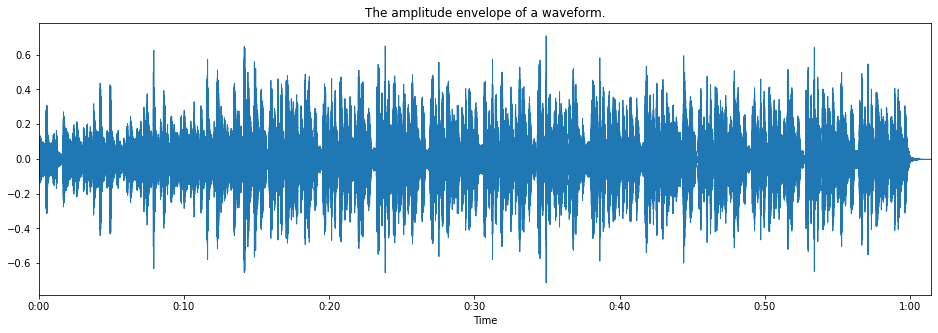

In [7]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(16, 5))
plt.title('The amplitude envelope of a waveform.')
librosa.display.waveplot(y, sr=sr)

### Spectrogram
We can also display a spectrogram using librosa.display.specshow.

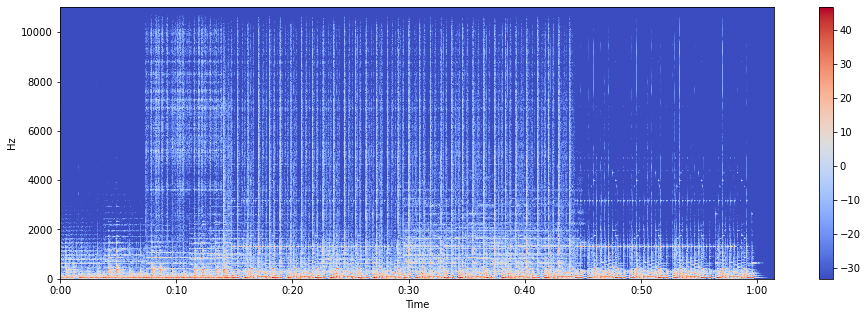

In [8]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(16, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Log-Frequency axis

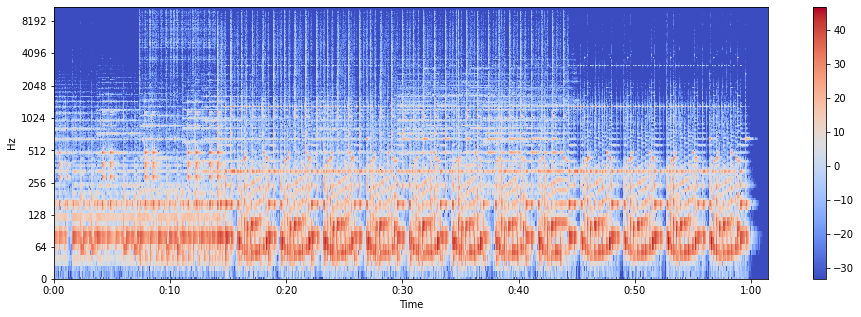

In [10]:
plt.figure(figsize=(16, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Creating an audio signal
Let us now create an audio signal at 220Hz. We know an audio signal is a numpy array, so we shall create one and pass it on to the audio function.

In [32]:
samp_r = 16000                                     # sample rate
T = 0.1                                            # seconds
t = np.linspace(0, T, int(T * sr), endpoint=False) # time variable
x = 0.5 * np.sin(2 * np.pi * 220 * t)              # pure sine wave at 220 Hz

### Visualize the signal

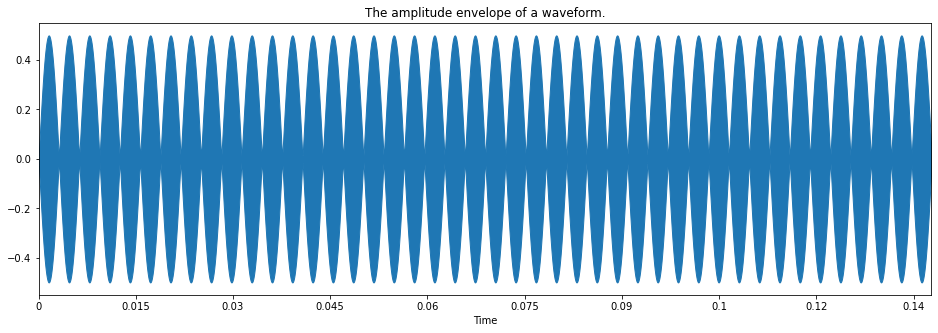

In [33]:
plt.figure(figsize=(16, 5))
plt.title('The amplitude envelope of a waveform.')
librosa.display.waveplot(x, sr=samp_r)

## Feature extraction

### 1. Zero Crossing Rate

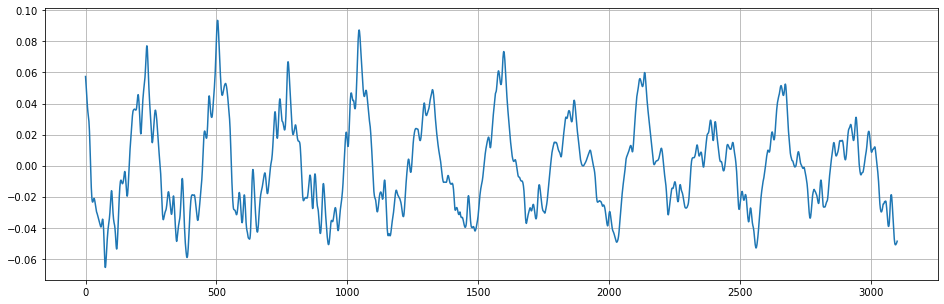

In [48]:
# Zooming in
n0 = 7000
n1 = 10100
plt.figure(figsize=(16, 5))
plt.plot(y[n0:n1])
plt.grid()

In [49]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
zero_crossings.shape

(3100,)

In [50]:
print(sum(zero_crossings))

35


### 2. Spectral Centroid

In [51]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids.shape

(2647,)

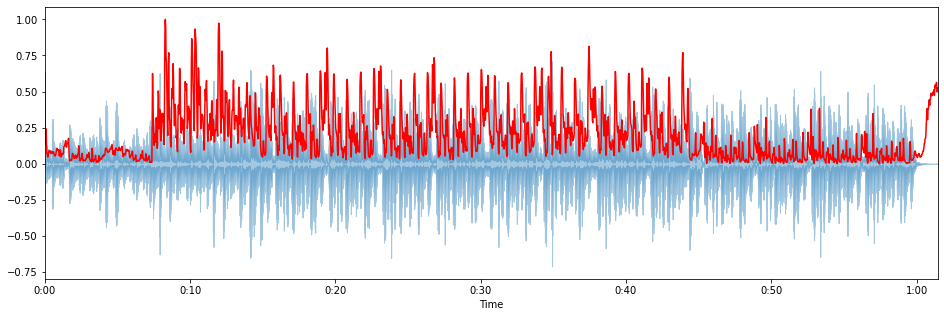

In [53]:
import sklearn
# Computing the time variable for visualization
plt.figure(figsize=(16, 5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### 3. Spectral Roll-off

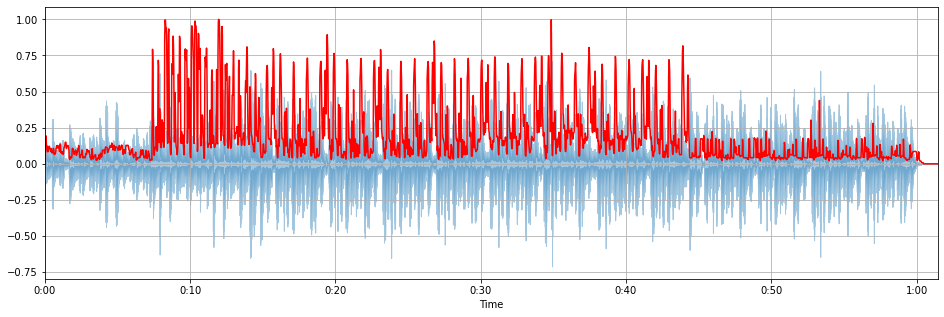

In [54]:
plt.figure(figsize=(16, 5))
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

### 4. Mel-Frequency Cepstral Coefficients (MFCCs)

(13, 2647)


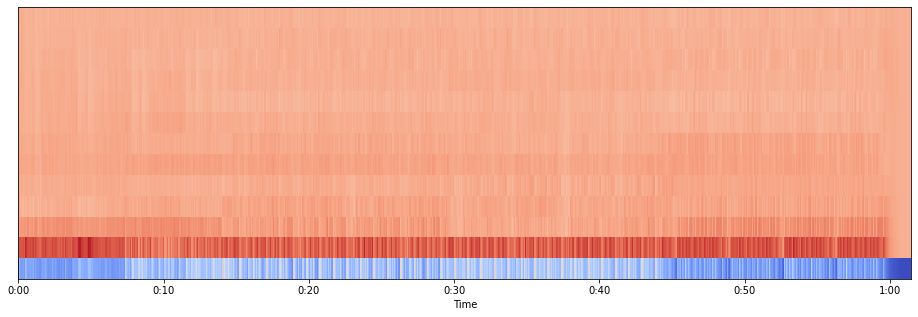

In [70]:
plt.figure(figsize=(16, 5))
mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=13)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Feature scaling

Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [67]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 5.7645595e-09  2.8822797e-09  5.7645595e-09  1.1529119e-08
 -1.1529119e-08  0.0000000e+00  5.7645595e-09  0.0000000e+00
 -5.7645595e-09 -5.7645595e-09  0.0000000e+00 -1.1529119e-08
  0.0000000e+00]
[1.        1.0000002 1.        1.        1.        0.9999999 1.
 1.        1.        1.        1.        1.        1.       ]


c:\users\anasvaf\anaconda3\envs\audio\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\anasvaf\anaconda3\envs\audio\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


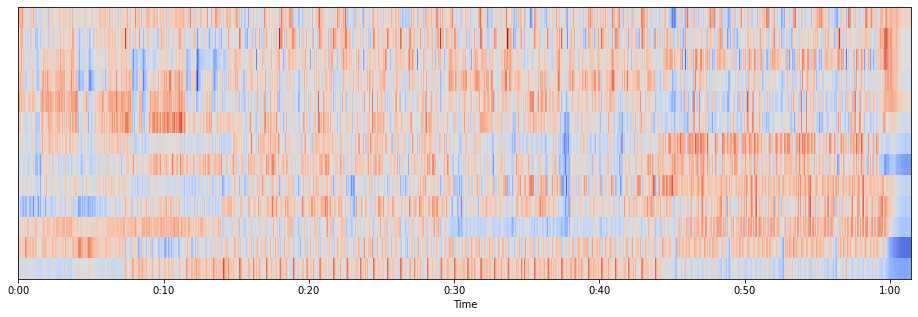

In [68]:
plt.figure(figsize=(16, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Chroma Frequencies

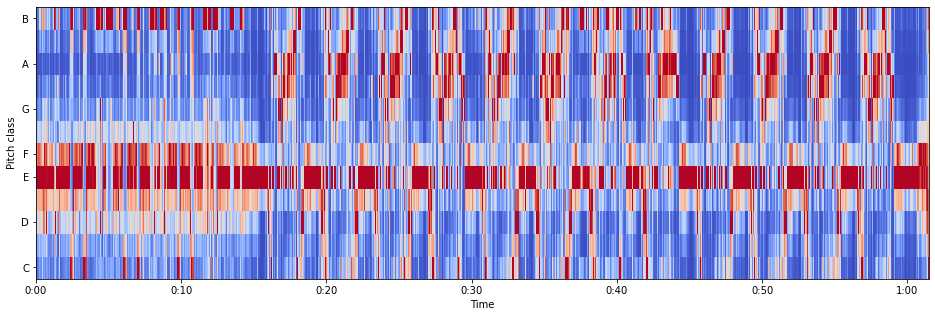

In [60]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
plt.figure(figsize=(16, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

## Chroma energy normalized
The output of CENS contains the 12 element representation of the chroma energy thoroughout the song. The 12 element each will be summarized using mean and standard deviation accross the entire song.

,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,...,chroma_std_2,chroma_std_3,chroma_std_4,chroma_std_5,chroma_std_6,chroma_std_7,chroma_std_8,chroma_std_9,chroma_std_10,chroma_std_11
0,0.269552,0.2529,0.328342,0.473449,0.734075,0.47384,0.317421,0.29015,0.341153,0.345936,...,0.272821,0.263498,0.329943,0.264785,0.208096,0.260355,0.339761,0.369152,0.274566,0.336544


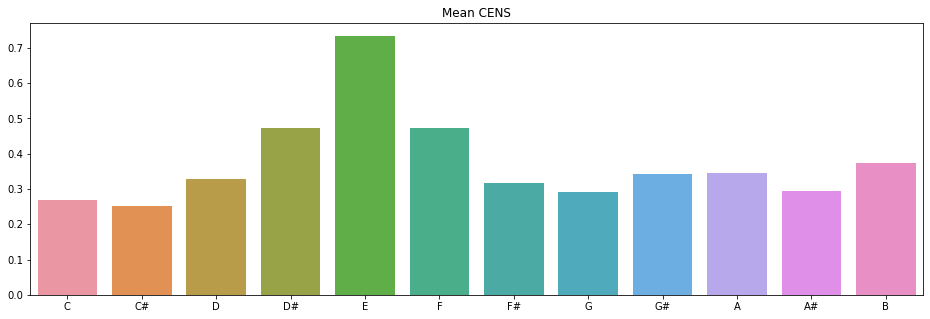

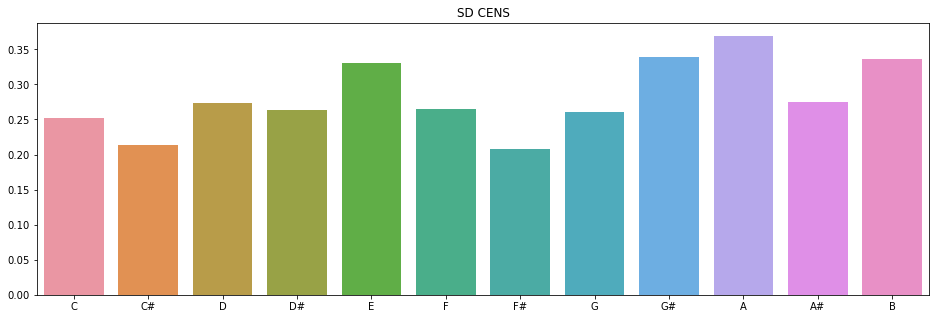

In [64]:
import seaborn as sns
import pandas as pd

chroma_mean = np.mean(chromagram, axis=1)
chroma_std = np.std(chromagram, axis=1)
#plot the summary
octave = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.figure(figsize=(16, 5))
plt.title('Mean CENS')
sns.barplot(x=octave,y=chroma_mean)

plt.figure(figsize=(16,5))
plt.title('SD CENS')
sns.barplot(x=octave,y=chroma_std)
#Generate the chroma Dataframe
chroma_df=pd.DataFrame()
for i in range(0, 12):
    chroma_df['chroma_mean_' + str(i)] = chroma_mean[i]
for i in range(0, 12):
    chroma_df['chroma_std_' + str(i)] = chroma_mean[i]
chroma_df.loc[0]=np.concatenate((chroma_mean,chroma_std),axis=0)

chroma_df

## MFCCs normalized
To characterize the whole music piece, the mean and standard deviation of MFCC of all frames in a music piece are used as features.

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,mfccs_std_3,mfccs_std_4,mfccs_std_5,mfccs_std_6,mfccs_std_7,mfccs_std_8,mfccs_std_9,mfccs_std_10,mfccs_std_11,mfccs_std_12
0,-307.745453,141.372467,44.80423,21.470201,13.213068,26.862692,16.161318,7.381439,-1.169455,4.778296,...,14.485435,11.303263,9.461699,11.082202,9.074496,10.549645,7.794276,8.922257,6.710418,6.265234


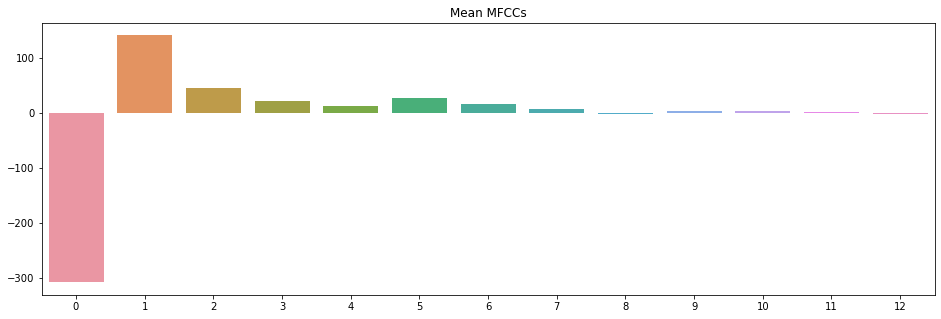

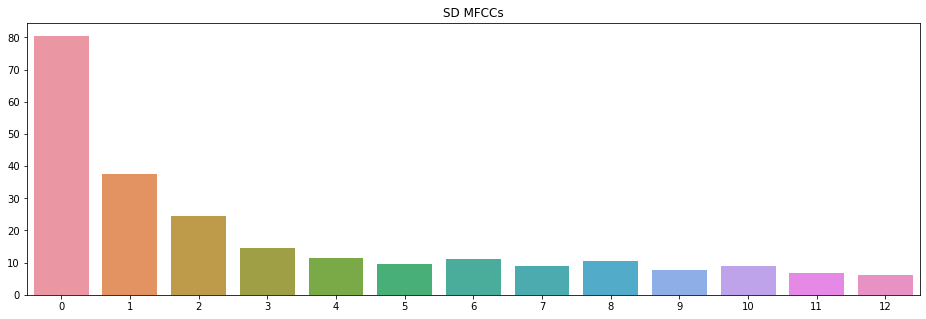

In [71]:
mfccs_mean = np.mean(mfccs, axis=1)
mfccs_std = np.std(mfccs, axis=1)

coeffs = np.arange(0, 13)
plt.figure(figsize=(16, 5))
plt.title('Mean MFCCs')
sns.barplot(x=coeffs, y=mfccs_mean)

plt.figure(figsize=(16, 5))
plt.title('SD MFCCs')
sns.barplot(x=coeffs, y=mfccs_std)
#Generate the MFCCs Dataframe
mfccs_df=pd.DataFrame()
for i in range(0, 13):
    mfccs_df['mfccs_mean_' + str(i)] = mfccs_mean[i]
for i in range(0, 13):
    mfccs_df['mfccs_std_' + str(i)] = mfccs_mean[i]
mfccs_df.loc[0]=np.concatenate((mfccs_mean, mfccs_std), axis=0)
mfccs_df

## Generate the Final DataFrame

In [72]:
final_df = pd.concat((chroma_df,mfccs_df), axis=1)
final_df.head()

,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,...,mfccs_std_3,mfccs_std_4,mfccs_std_5,mfccs_std_6,mfccs_std_7,mfccs_std_8,mfccs_std_9,mfccs_std_10,mfccs_std_11,mfccs_std_12
0,0.269552,0.2529,0.328342,0.473449,0.734075,0.47384,0.317421,0.29015,0.341153,0.345936,...,14.485435,11.303263,9.461699,11.082202,9.074496,10.549645,7.794276,8.922257,6.710418,6.265234
